# Week 48

In [1]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install -q "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 6)
import numpy as np

## Interpretation of binding data.

The `interpret_week48.xlsx` contains protein binding dataset.

#### (a) Load the dataset

Load the dataset using the widget below

In [3]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [4]:
df = uploader.get_dataframe()
display(df)

In [5]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('interpret_week48') # Load from package for the solution so it doesn't require to interact.
display(df)

45 rows × 2 columns

#### (b) SI Units

Add a new column to the `DataFrame` with the ligand concentration in SI
units.

In [7]:
df['[L]_(M)'] = df["[L]_(uM)"] * 10**(-6)
display(df)

45 rows × 3 columns

#### (c) Plot the data

Make plots of the binding data directly with a linear and logarithmic
x-axis.

Estimate Kd by visual inspection of these plots!

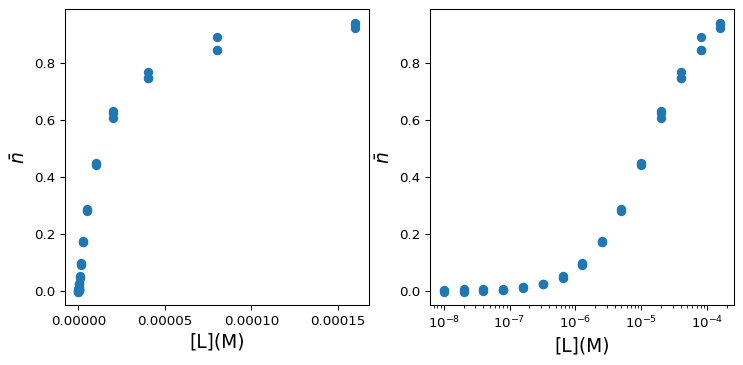

In [9]:
import matplotlib.pyplot as plt

# This makes a figure with two axes.
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Can with [0] to plot in the first axis.
ax = axes[0]
ax.plot(df['[L]_(M)'], df['nbar'], 'o') # Replace ... with your code.
ax.set_xlabel('[L](M)', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)

ax = axes[1]
ax.plot(df['[L]_(M)'], df['nbar'], 'o')
ax.set_xlabel('[L](M)', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)
ax.set_xscale('log')

> **Tip**
>
> Ths command `ax.set_xscale('log')` tells `matplotlib` that we want the
> x-axis to use a log-scale.

In [11]:
k_d_estimate = 5 * 10**(-5)

#### (d) Make a fit

Make a fit to determine $K_D$, as always we start by implementing the
function to fit with

In [13]:
def n_bar(L, K_D):
    return L / (L + K_D)

And then we can make the fit

In [15]:
from scipy.optimize import curve_fit

# Choose the variables from the dataframe
x = df['[L]_(M)']
y = df['nbar']

# Initial guess
p0 = [k_d_estimate]

# Bounds
bounds = (0, np.inf) # We limit the parameters to be positve.

# Curve fit
popt, pcov = curve_fit(n_bar, x, y, p0=p0, bounds=bounds)

# Print the parameters
k_d_fit = popt[0]
print(f"{k_d_fit = :e}")

k_d_fit = 1.245798e-05

#### Compare

Use the figure below to compare your guess with the fitted value.

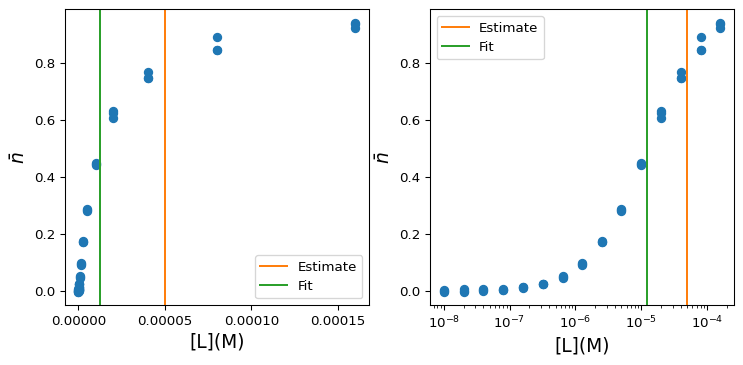

In [16]:
import matplotlib.pyplot as plt

# This makes a figure with two axes.
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Can with [0] to plot in the first axis.
ax = axes[0]
ax.plot(df['[L]_(M)'], df['nbar'], 'o')
ax.axvline(k_d_estimate, label='Estimate', color='C1')
ax.axvline(k_d_fit, label='Fit', color='C2')
ax.legend()

ax.set_xlabel('[L](M)', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)

ax = axes[1]
ax.plot(df['[L]_(M)'], df['nbar'], 'o')
ax.set_xlabel('[L](M)', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)
ax.axvline(k_d_estimate, label='Estimate', color='C1')
ax.axvline(k_d_fit, label='Fit', color='C2')
ax.legend()
ax.set_xscale('log')

#### Saturation

Based on the value of $K_D$ found from the fit,

-   At which concentration do you expect 10% saturation?
-   At which concentration do you expect 90% saturation?

------------------------------------------------------------------------

## Determination of type and strength of cooperativity

The binding of NAD+ to the protein yeast glyceraldehyde 3-phosphate
dehydrogenase (GAPDH) was studied using equilibrium dialysis. The enzyme
concentration was 71 μM. The concentration of
$[\text{NAD}^{+}_\text{free}]$ and the corresponding values of $\bar{n}$
were determined with the resulting data found in the dataset
`determination_coop_week48.xlsx`.

#### (a) Load the dataset

Load the dataset using the widget below

In [17]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [18]:
df = uploader.get_dataframe()
display(df)

In [19]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('determination_coop_week48') # Load from package for the solution so it doesn't require to interact.
display(df)

9 rows × 4 columns

#### (b) Averaging and units.

Start by adding a new column to the `DataFrame` with the average value
of $\bar{n}$ across the three series

> **Tip**
>
> Remember that you can set a new column based on a computation using
> one or more other columns, e.g. 
>
> ``` python
> df['new_col'] = df['col1'] + df['col2']
> ```

In [21]:
df['nbar_avg'] = (df['nbar1'] + df['nbar2'] + df['nbar3']) / 3

Now also add a column with the ligand concentration in SI units with the
column-name `[NAD+free]_(M)`.

In [23]:
df['[NAD+free]_(M)'] = df['[NAD+free]_(uM)'] * 10**(-6)
display(df)

9 rows × 6 columns

Finally, set the concentration of the GADPH in SI units

In [24]:
 c_gadph = 71 * 10**(-6)

#### (c) Plot

Make a plot of the average $\bar{n}$ as a function of
$[\text{NAD}^{+}_\text{free}]$.

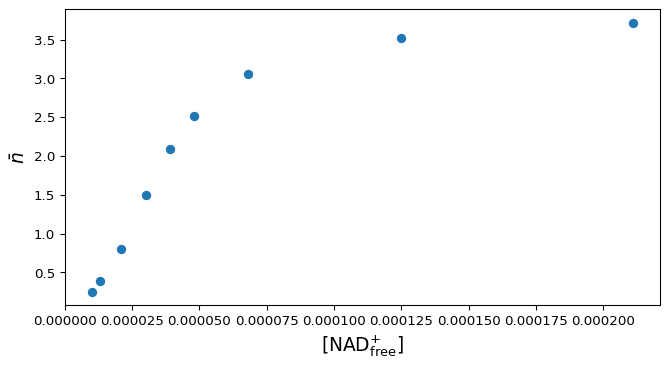

In [26]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df['[NAD+free]_(M)'], df['nbar_avg'], 'o')
ax.set_xlabel(r'$[\text{NAD}^{+}_\text{free}]$', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)
plt.show()

#### (d) Scatchard plot

Make a Scatchard plot based on the average $\bar{n}$.

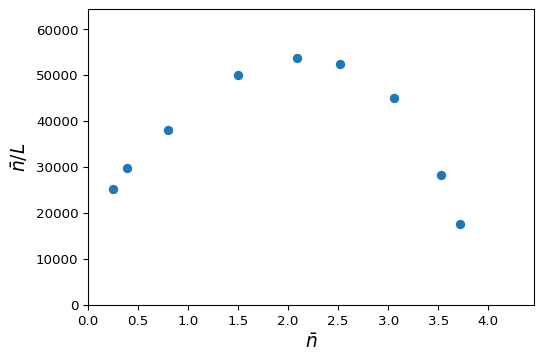

In [28]:
# Calculate nbar / L 
nbar_over_L = df['nbar_avg'] / df['[NAD+free]_(M)']

fig, ax = plt.subplots(figsize=(6, 4)) 
ax.plot(df['nbar_avg'], nbar_over_L, 'o')
ax.set_xlabel(r'$\bar{n}$', fontsize=14)
ax.set_ylabel(r'$\bar{n}/L$', fontsize=14)
ax.set_xlim([0, df['nbar_avg'].max()*1.2])
ax.set_ylim([0, nbar_over_L.max() * 1.2])

#### (e) Binding sites

How many binding sites does GAPDH contain for $\text{NAD}^{+}$?

#### (f) Cooperativity

What type of cooperativity do the plots indicate?

#### (g) Fit

Make a fit using the functional form

$$
\bar{n} = N \frac{[L]^h}{K_D + [L]^h}
$$

As usual, start by defining the function in Python

In [29]:
def n_bar(L, N, k_d, h):
    return N * L**h / (k_d + L**h)

Now we can fit

In [32]:
from scipy.optimize import curve_fit

# Choose the variables from the dataframe
x = np.concatenate([df['[NAD+free]_(M)'], df['[NAD+free]_(M)'], df['[NAD+free]_(M)']])
y = np.concatenate([df['nbar1'], df['nbar2'], df['nbar3']])

# Initial guess
p0 = [4, 1*10**(-4), 1]

# Bounds
bounds = (0, np.inf) # We limit the parameters to be positve.

# Curve fit
popt, pcov = curve_fit(n_bar, x, y, p0=p0, bounds=bounds)

# Print the parameters
N_fit, k_d_fit, h_fit = popt
print(f"{N_fit = :.3f}")
print(f"{k_d_fit = :e}")
print(f"{h_fit = :.3f}")

N_fit = 4.048
k_d_fit = 1.278350e-08
h_fit = 1.791

#### (h) Plot with fit

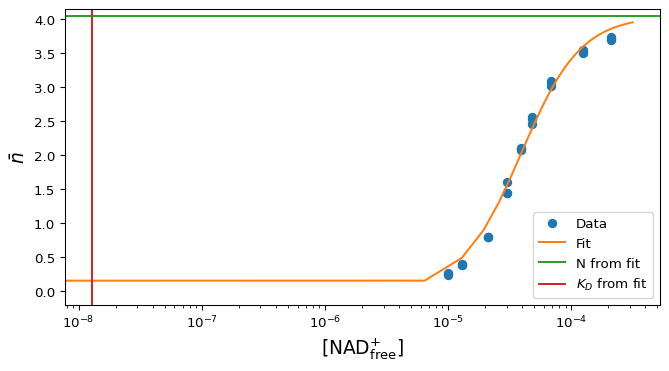

In [34]:
L = np.linspace(0, df['[NAD+free]_(M)'].max()*1.5)
n_bar_fit = n_bar(L, N_fit, k_d_fit, h_fit)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, 'o', label='Data')
ax.plot(L, n_bar_fit, '-', label='Fit')
ax.axhline(N_fit, color='C2', label='N from fit')
ax.axvline(k_d_fit, color='C3', label=r'$K_D$ from fit')
ax.set_xscale('log')
ax.set_xlabel(r'$[\text{NAD}^{+}_\text{free}]$', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)
ax.legend()
plt.show()

------------------------------------------------------------------------

## Determination of reaction orders.

#### (a) Load the dataset

Load the dataset using the widget below

In [35]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [36]:
df = uploader.get_dataframe()
display(df)

In [37]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('reaction_order_week48') # Load from package for the solution so it doesn't require to interact.
display(df)

51 rows × 3 columns

#### (b) SI units.

Add two new columns with the concentrations given in M.

In [39]:
df['[A1]_(M)'] = df['[A1]_(uM)'] * 10**(-6)
df['[A2]_(M)'] = df['[A2]_(uM)'] * 10**(-6)
display(df)

51 rows × 5 columns

#### (c) Plotting

For each reactant make a plot of

-   $t$ vs. $[\text{A}]$

> **Note**
>
> We will be adding more elements to the plot in the following parts of
> the exercise, therefore we will wrap the code for plotting in a
> function such that it can be easily reused.

The cell below defines the function for plotting, add the missing code
in places with `...`.

In [40]:
def plot_dataframe(ax, df):
    # Extract from dataframe
    t = df['Time_(s)']
    A1 = df['[A1]_(M)']
    A2 = df['[A2]_(M)']

    ax.plot(t, A1, 'o', label='[A1]')
    ... # Your code here to plot A2

    for ax in axes:
        ax.set_xlabel('t [s]')
        ax.legend()

In [41]:
def plot_dataframe(ax, df):
    # Extract from dataframe
    t = df['Time_(s)']
    A1 = df['[A1]_(M)']
    A2 = df['[A2]_(M)']

    # First subfigure: t vs [A]
    ax.plot(t, A1, 'o', label='[A1]')
    ax.plot(t, A2, 'o', label='[A2]')
    ax.set_xlabel('t [s]')
    ax.legend()

Once we’ve written the plotting function we can make the plot as done in
the cell below.

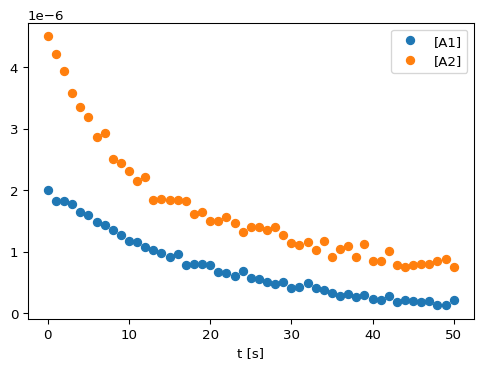

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

plot_dataframe(ax, df)

#### (d) Determining reaction orders

Now we want to determine the reaction orders by making fits to the data
under the assumption of different integrated rate laws.

In the cell below finish the code to define functions for the integrated
rate laws of zeroth, first and second order.

In [45]:
def zeroth_order(t, k, A0):
    return A0 - k*t

def first_order(t, k, A0):
    return A0 * np.exp(-k*t)

def second_order(t, k, A0):
    return A0 / (1 + 2*k*t*A0)

rate_laws = {0: zeroth_order, 1: first_order, 2:second_order}

We can then use these to make fits, here it is helpful to define a small
function to help us with that.

In [46]:
from scipy.optimize import curve_fit

def make_fit(x_data, y_data, x_eval, A0, order):
    func = lambda t, k: rate_laws[order](t, k, A0)
    popt, pcov = curve_fit(func, x_data, y_data)

    # Evaluate fit
    k = popt[0]
    y_fit = func(x_eval, k)
    return k, y_fit

Next we will define the known constants and extract a few things from
the `DataFrame`. In the cell below put the initial concentrations in M.

In [48]:
# Set the initial concentrations:
A1_0 = 2 * 10**(-6)
A2_0 = 4.5 * 10**(-6)

# Extract data
t = df['Time_(s)']
A1 = df['[A1]_(M)']
A2 = df['[A2]_(M)']
orders = [0, 1, 2]
t_eval = np.linspace(0, t.max()*1.1)

Now we can make and plot the fits

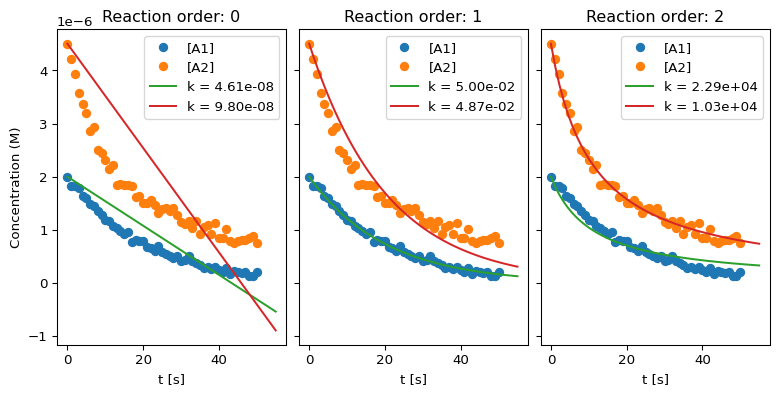

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4), sharey=True, layout='constrained')

axes[0].set_ylabel('Concentration (M)')

for ax in axes:
    plot_dataframe(ax, df)

for ax, order in zip(axes, orders):
    k1, y_fit = make_fit(t, A1, t_eval, A1_0, order)
    ax.plot(t_eval, y_fit, color='C2', label=rf'k = {k1:.2e}')

    k2, y_fit = make_fit(t, A2, t_eval, A2_0, order)
    ax.plot(t_eval, y_fit, color='C3', label=rf'k = {k2:.2e}')
    ax.legend()
    ax.set_title(f'Reaction order: {order}')

Based on this plot;

-   What do you believe is the reaction order for \[A1\]?
-   What is the unit of the rate constant for \[A1\]?
-   What do you believe is the reaction order for \[A2\]?
-   What is the unit of the rate constant for \[A2\]?

#### (e) Residuals

By inspecting the plot we can make a qualitative judgement of the
reaction orders. To get a more quantitative results we can look at the
residuals, recall they are defined as

$$
r_i = y_i - f(x_i | \theta)
$$

We can calculate these in much the same way we calculate the fits,
except we don’t evaluate the fit at a new set of points but at the
observations $x_i$.

In [50]:
def calculate_residuals(x_data, y_data, A0, order):
    func = lambda t, k: rate_laws[order](t, k, A0)
    popt, pcov = curve_fit(func, x_data, y_data)

    # Evaluate fit
    k = popt[0]
    y_fit = func(x_data, k)
    residuals = y_data - y_fit
    return residuals

We can then plot the residuals, here using a histogram where the x-axis
is the value of the residual and the bars indicate the number of
residuals within that range of values.

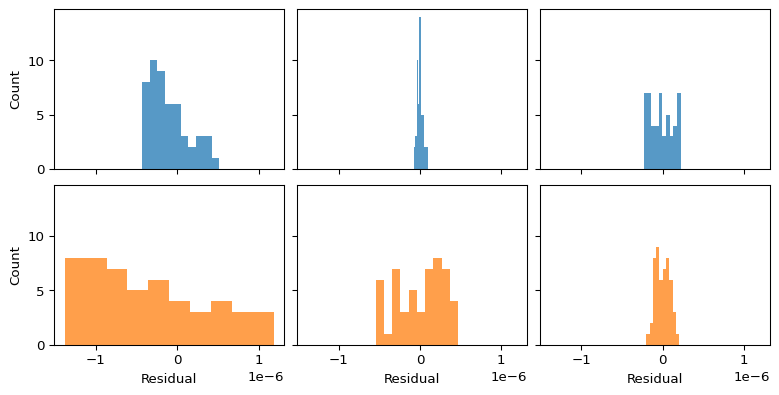

In [52]:
fig, axes = plt.subplots(2, 3, figsize=(8, 4), sharey=True, layout='constrained', sharex=True)

axes[0, 0].set_ylabel('Count')
axes[1, 0].set_ylabel('Count')

for ax_col, order in zip(axes.T, orders):

    residuals = calculate_residuals(t, A1, A1_0, order)
    ax_col[0].hist(residuals, alpha=0.75, color='C0')

    residuals = calculate_residuals(t, A2, A2_0, order)
    ax_col[1].hist(residuals, alpha=0.75, color='C1')

    ax_col[1].set_xlabel('Residual')

Does this support your conclusions about the reaction order from (d)?

## Analysis of a reversible reaction

Consider the following reaction

$$
A \underset{k_{2}}{\stackrel{k_1}{\rightleftharpoons}} B
$$

The magnitudes of the rate constants are $k_1 = 10 \ \mathrm{s}^{-1}$
and $k_2 = 1 \ \mathrm{s}^{-1}$.

#### (a) Reaction order

What is the reaction order in each direction?

#### (b) Derive equilibrium constant

Show mathematically how the equilibrium constant $K_{\mathrm{eq}}$ is
given by the ratio between the two rate constants.

#### (c) Calculate $K_{\mathrm{eq}}$

In [54]:
k1 = 10 
k2 = 1
K_eq = k1 / k2
print(f"{K_eq = }")

K_eq = 10.0

#### (d) Equilibrium concentrations

Calculate the concentrations of A and B at equilibrium,
$[\mathrm{A}]_{\mathrm{eq}}$ and $[\mathrm{B}]_\mathrm{eq}$, if
$[\mathrm{A}]_0 = 10^{-3} \text{M}$

In [56]:
A0 = 10**(-3)
A_eq = (k2 * A0) / (k1 + k2)
B_eq = (k1 * A0) / (k1 + k2)
print(f"{A_eq = }")
print(f"{B_eq = }")

A_eq = 9.090909090909092e-05
B_eq = 0.0009090909090909091

#### (e) Rates at equilibrium

Calculate the forward and reverse rates at equilibrium at this
concentration.

In [58]:
r_fwd = A_eq * k1
r_bwd = B_eq * k2 # Sanity check
print(f"{r_fwd = :.5f}")
print(f"{r_bwd = :.5f}")

r_fwd = 0.00091
r_bwd = 0.00091

#### (f) Initial rate of formation

If $[\mathrm{A}]_0 = 10^{-3} \text{M}$ and
$[\mathrm{B}]_0 = 0 \text{M}$, calculate the initial rate of formation
of B.

In [60]:
r_fwd = A0 * k1
print(f"{r_fwd = :.5f}")

r_fwd = 0.01000

#### (g) Time-dependence

![](https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/lessons/figures/week_48/reversible_reaction.png)

We now want to calculate and plot the time-dependent concentrations
using the above equations.

In the cell below finish the implementation of the function `A_time`
that calculates the concentration \[A\] as a function of time.

In [62]:
def A_time(t, A0, k_f, k_b):
    return (k_b + k_f * np.exp(-(k_f+k_b)*t)) / (k_f + k_b) * A0

And then we can use that function to calculate and plot the
concentrations as a function of time.

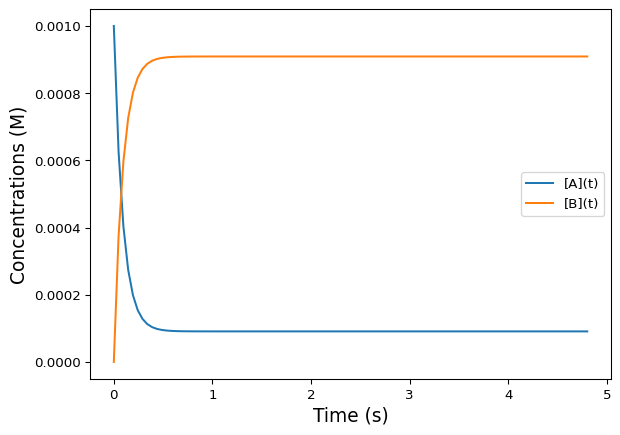

In [64]:
fig, ax = plt.subplots()

t_max = 0.08 * 60 # Time in seconds
t = np.linspace(0, t_max, 100)

At = A_time(t, A0, k1, k2)
Bt = A0 - At

ax.plot(t, At, label='[A](t)')
ax.plot(t, Bt, label='[B](t)')
ax.set_ylabel('Concentrations (M)', fontsize=14)
ax.set_xlabel('Time (s)', fontsize=14)
ax.legend()